In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
dataset = np.load('proyecto_training_data.npy', allow_pickle = False)
dataset.shape

(1460, 6)

## 2. Separar los datos en dos conjuntos: entrenamiento y validación/pruebas
#### Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validacion y pruebas(20 %).

In [11]:

dataset = np.load('proyecto_training_data.npy')
train_size = int(0.8 * dataset.shape[0])
train_data = dataset[:train_size]
validation_data = dataset[train_size:]

In [12]:
# Calcula las estadísticas descriptivas de cada variable utilizando NumPy o Pandas
# Paso 3: Análisis exploratorio de datos
# Por ejemplo:
mean_x = np.mean(train_data[:, 0])
max_x = np.max(train_data[:, 0])
min_x = np.min(train_data[:, 0])
range_x = np.ptp(train_data[:, 0])
std_x = np.std(train_data[:, 0])

C:\Users\Mario\AppData\Local\Temp\ipykernel_24504\110248602.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[:, 0])


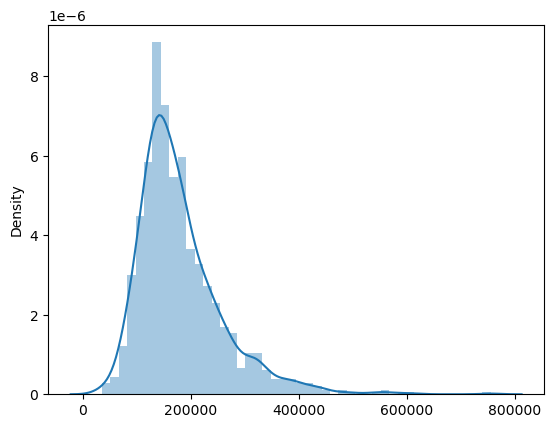

In [13]:
# Paso 4: Gráfico de histograma para cada variable utilizando Seaborn

# Por ejemplo:
sns.distplot(train_data[:, 0])
plt.show()

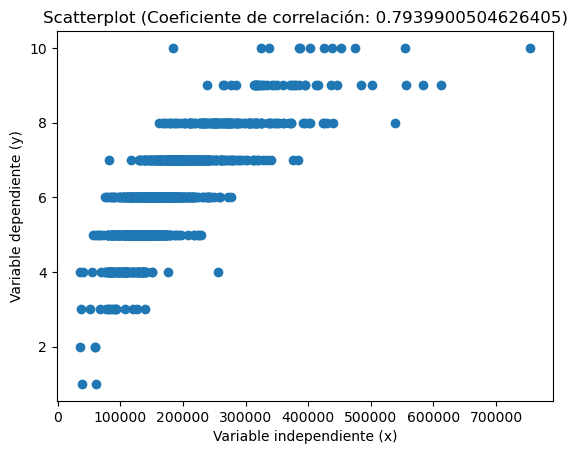

In [14]:
# Paso 5: Calcular el coeficiente de correlación y graficar el scatterplot

# Por ejemplo, suponiendo que la columna 0 es la variable independiente (x) y la columna 1 es la variable dependiente (y):
corr_coef = np.corrcoef(train_data[:, 0], train_data[:, 1])[0, 1]

plt.scatter(train_data[:, 0], train_data[:, 1])
plt.title(f"Scatterplot (Coeficiente de correlación: {corr_coef})")
plt.xlabel("Variable independiente (x)")
plt.ylabel("Variable dependiente (y)")
plt.show()

In [17]:
# Paso 6: Crear una función para entrenar un modelo de regresión lineal de una variable

def train_linear_regression_model(x, y, epochs, print_error_each, learning_rate):
    # Inicializar los parámetros del modelo
    beta0 = 0.0
    beta1 = 0.0
    
    # Crear una matriz de diseño con una columna de unos y la variable independiente
    X = np.column_stack((x, np.ones_like(x)))
    
    # Almacenar los errores en cada iteración
    errors = []
    
    for epoch in range(epochs):
        # Calcular las predicciones
        y_pred = np.dot(X, np.array([beta1, beta0]))
        
        # Calcular el error
        error = np.mean((y_pred - y) ** 2)
        errors.append(error)
        
        if epoch % print_error_each == 0:
            print(f"Iteración: {epoch}, Error: {error}")
        
        # Calcular los gradientes
        delta_beta1 = (1 / len(x)) * np.dot((y_pred - y), x)
        delta_beta0 = (1 / len(x)) * np.sum(y_pred - y)
        
        # Actualizar los parámetros del modelo
        beta1 -= learning_rate * delta_beta1
        beta0 -= learning_rate * delta_beta0
    
    return beta0, beta1, errors

# Ejemplo de uso de la función:
x_train = train_data[:, 0]
y_train = train_data[:, 1]
epochs = 1000
print_error_each = 10
learning_rate = 0.01

beta0, beta1, errors = train_linear_regression_model(x_train, y_train, epochs, print_error_each, learning_rate)


Iteración: 0, Error: 39.11986301369863
Iteración: 10, Error: 2.1954903315438506e+173
Iteración: 20, Error: inf
Iteración: 30, Error: inf
Iteración: 40, Error: nan
Iteración: 50, Error: nan
Iteración: 60, Error: nan
Iteración: 70, Error: nan
Iteración: 80, Error: nan
Iteración: 90, Error: nan
Iteración: 100, Error: nan
Iteración: 110, Error: nan
Iteración: 120, Error: nan
Iteración: 130, Error: nan
Iteración: 140, Error: nan
Iteración: 150, Error: nan
Iteración: 160, Error: nan
Iteración: 170, Error: nan
Iteración: 180, Error: nan
Iteración: 190, Error: nan
Iteración: 200, Error: nan
Iteración: 210, Error: nan
Iteración: 220, Error: nan
Iteración: 230, Error: nan
Iteración: 240, Error: nan
Iteración: 250, Error: nan
Iteración: 260, Error: nan
Iteración: 270, Error: nan
Iteración: 280, Error: nan
Iteración: 290, Error: nan
Iteración: 300, Error: nan
Iteración: 310, Error: nan
Iteración: 320, Error: nan
Iteración: 330, Error: nan
Iteración: 340, Error: nan
Iteración: 350, Error: nan
Itera

C:\Users\Mario\AppData\Local\Temp\ipykernel_24504\2433865898.py:19: RuntimeWarning: overflow encountered in square
  error = np.mean((y_pred - y) ** 2)
C:\Users\Mario\AppData\Local\Temp\ipykernel_24504\2433865898.py:30: RuntimeWarning: invalid value encountered in scalar subtract
  beta1 -= learning_rate * delta_beta1


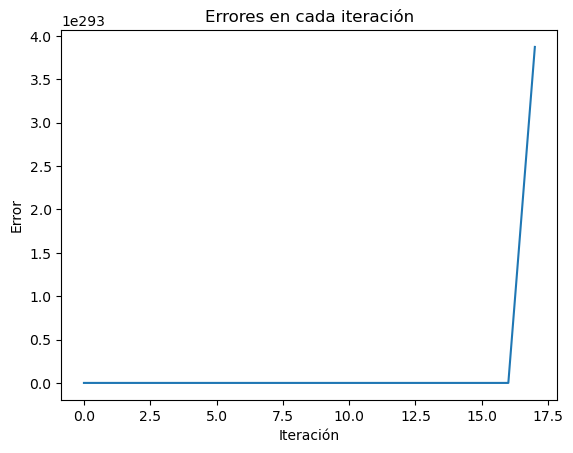

In [18]:
# Paso 7: Realizar el gráfico de los errores en cada iteración

plt.plot(range(epochs), errors)
plt.title("Errores en cada iteración")
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.show()